In [1]:
import numpy as np
from pathlib import Path
from matplotlib import pyplot as plt
import torch
from scipy import signal

In [9]:
# Load data
raw_data_path = list(Path("../stimuli/obvious_gaussian_clusters").iterdir())

data = []
 
for path in raw_data_path:
    data.append(np.load(path))
    
print("# of Stimuli: ", len(data))

stim = data[12]

print("Stimuli Shape: ", stim.shape)

# # Normalize Data + convert to int
# stim[:,0:2] = (stim[:,0:2]-np.min(stim[:,0:2])) * 10/(np.max(stim[:,0:2])-np.min(stim[:,0:2]))
# stim = stim.astype(int)

# of Stimuli:  18
Stimuli Shape:  (20, 3)


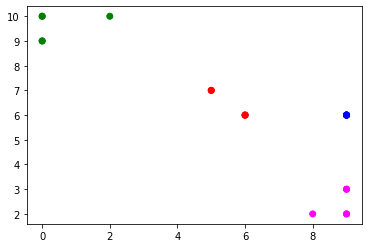

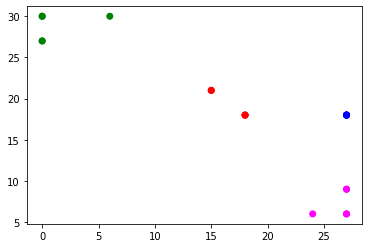

In [23]:
# Visualize Stimuli
colors = np.array(['red', 'blue', 'green', 'magenta', 'cyan', 'pink'])
def plot_stimuli(X):
    fig, ax = plt.subplots()
    c_idx = X[:, 2].astype(int)        
    c = colors[c_idx]
        
    ax.scatter(X[:, 0], X[:, 1], color=colors[X[:, 2].astype(int)])
    return ax

plot_stimuli(stim)

# Normalize Data + convert to int
# I should scale to a different number
stim[:,0:2] = (stim[:,0:2]-np.min(stim[:,0:2])) * 30/(np.max(stim[:,0:2])-np.min(stim[:,0:2]))
# stim = stim.astype(int)
stim1 = np.round(stim).astype(int)
plot_stimuli(stim1)

stim = stim1

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


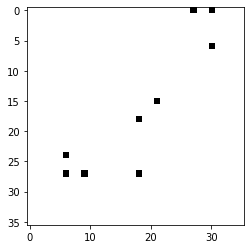

In [24]:
# Represent points as 2D image
im = np.zeros((36,36))
im[stim[:,0], stim[:,1]] = 1.0
print(im)

fig, ax2 = plt.subplots()
ax2.imshow(im, cmap='gray_r')

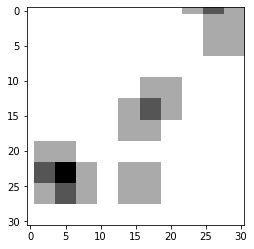

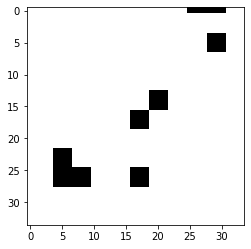

In [29]:
# Average Convolution

# kernel = np.ones((6,6)).astype(float) / 36

def avg_conv_2d(im, filt):
    out = np.zeros((4,4)).astype(float)
    
#     for i in range(out.shape[0]):
#         for j in range(out.shape[1]):
#             out[i,j] = signal.convolve2d(im[i:i+3, j:j+3], filt, mode='valid')
    out = signal.convolve2d(im, filt, mode='valid')
    return out

    
kernel = np.ones((6,6)).astype(float) / 36
out = avg_conv_2d(im, kernel)

fig, ax3 = plt.subplots()
ax3.imshow(out, cmap='gray_r')

kernel = np.ones((3,3)).astype(float) / 9
out = avg_conv_2d(im, kernel)

fig, ax3 = plt.subplots()
ax3.imshow(out, cmap='gray_r')